***TASK 2: MOVIE RATING PREDICTION USING PYTHON***
**Name: Abhishek Bara**i
**Batch: July**
***Domain: Data Science ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_movie = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDb Movies India.csv', sep=',', engine='python', encoding='latin-1')
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_movie.shape

(5659, 10)

In [ ]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [ ]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df_movie.dropna(subset=["Rating"], inplace=True)

In [ ]:
df_movie.dropna(subset=["Actor 1","Actor 2","Actor 3","Director","Genre"], inplace=True)

In [ ]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df_movie['Votes'] = df_movie['Votes'].str.replace(',','').astype(int)

In [ ]:
df_movie['Year'] = df_movie['Year'].str.strip('()').astype(int)

In [ ]:
df_movie['Duration'] = df_movie['Duration'].str.strip('min')

In [ ]:
df_movie['Duration'].fillna(df_movie['Duration'].median(), inplace=True)

In [ ]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [ ]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
top_movie = df_movie.loc[df_movie['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


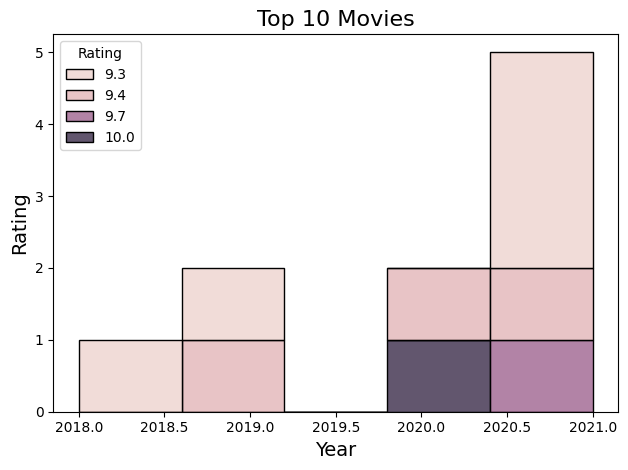

In [ ]:
sns.histplot(data=top_movie, x="Year",hue="Rating",multiple="stack")
plt.title("Top 10 Movies", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
genre_count = df_movie['Genre'].value_counts().reset_index()
genre_count.columns = ['Genre', 'Count']

top_n_genres = genre_count.head(5)
top_n_genres

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


<function matplotlib.pyplot.show(close=None, block=None)>

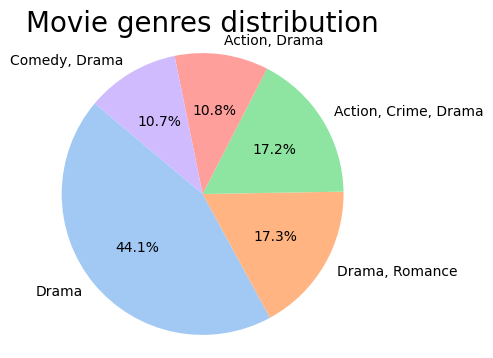

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel')[0:5])
plt.title('Movie genres distribution',fontsize=20)
plt.axis('equal')
plt.show

In [ ]:
director_avg_rating = df_movie.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = df_movie.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


<ipython-input-46-e3ee4448df6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Director',data=top_directors, palette='viridis')


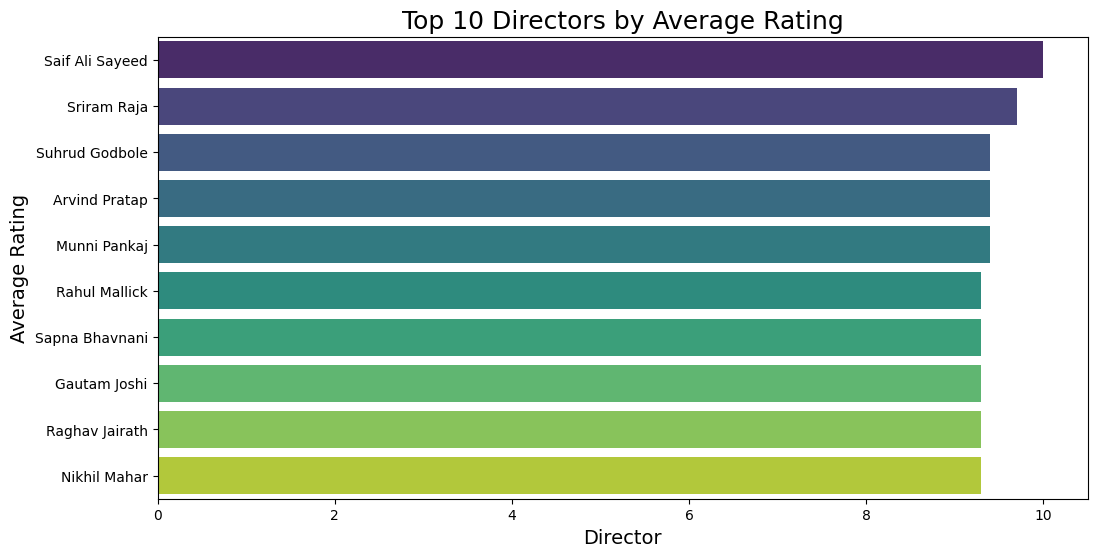

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Director',data=top_directors, palette='viridis')
plt.title('Top 10 Directors by Average Rating', fontsize=18)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

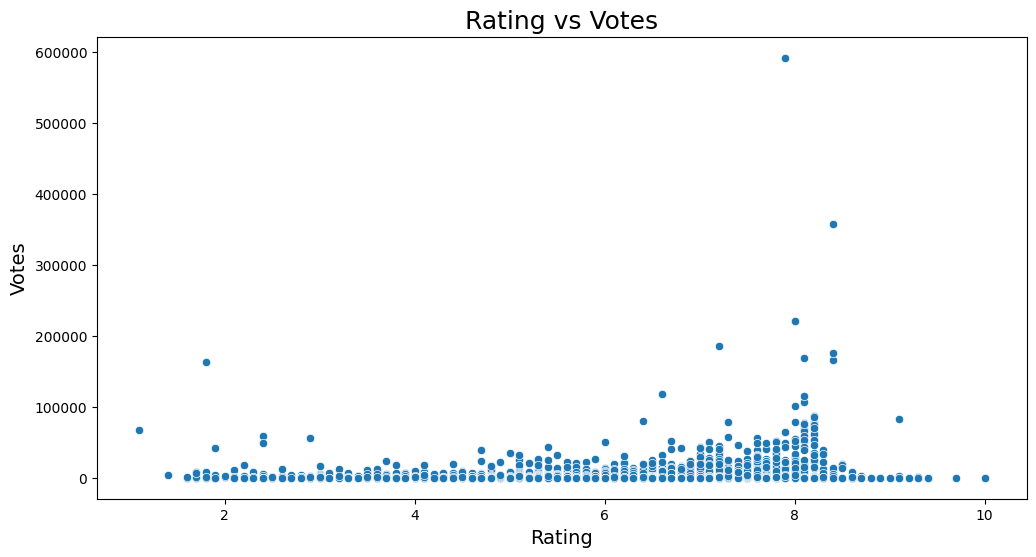

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Votes', data=df_movie)
plt.title('Rating vs Votes', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.show

In [ ]:
actors_count = df_movie['Actor 1'].value_counts().reset_index()
actors_count.columns = ['Actor', 'MovieCount']

top_n_actors = actors_count.head(10)
top_n_actors

,Actor,MovieCount
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


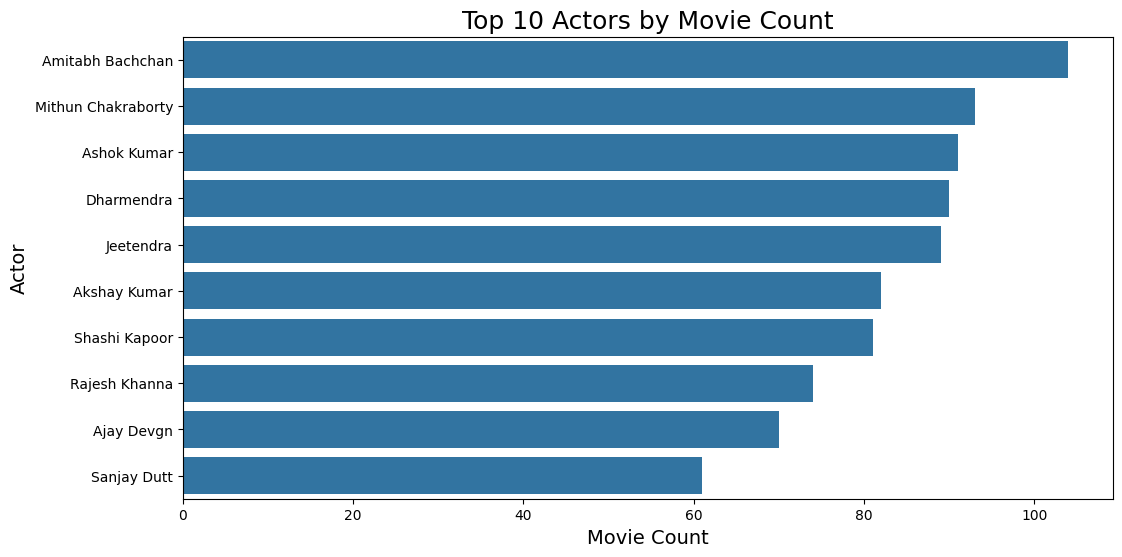

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='MovieCount', y='Actor', data=top_n_actors, orient='h')
plt.title('Top 10 Actors by Movie Count', fontsize=18)
plt.xlabel('Movie Count', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.show()


In [ ]:
yearly_movie_count = df_movie['Year'].value_counts().reset_index()
yearly_movie_count.columns = ['Year', 'MovieCount']
yearly_movie_count = yearly_movie_count.sort_values(by='Year')
yearly_movie_count

,Year,MovieCount
86,1931,2
90,1932,1
89,1933,1
88,1934,2
81,1935,5
...,...,...
1,2017,211
2,2018,202
0,2019,227
9,2020,140


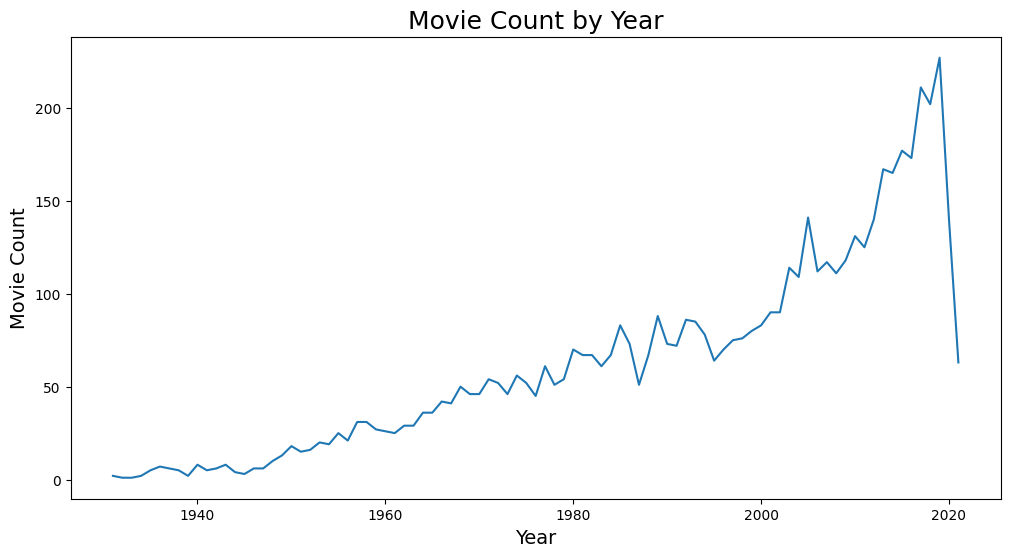

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_count, x='Year', y='MovieCount')
plt.title('Movie Count by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Movie Count', fontsize=14)
plt.show()

In [ ]:
filtered_df = df_movie[(df_movie['Rating'] > 8) & (df_movie['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-59-f75ba038ec0a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')


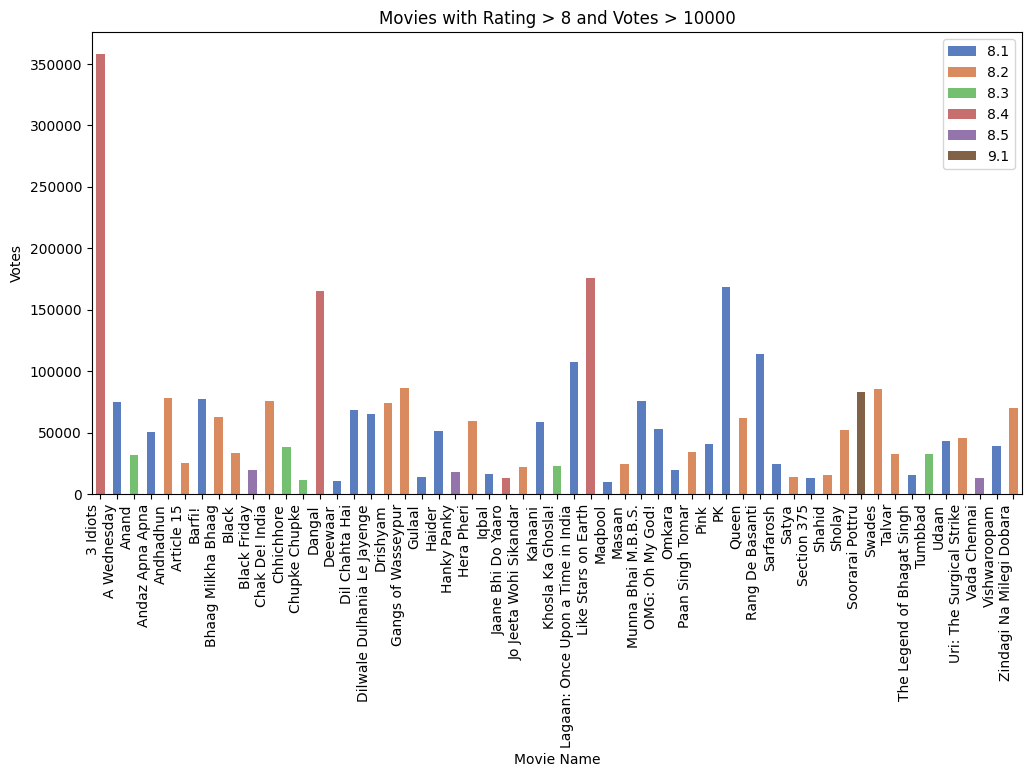

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=filtered_df, x='Name', y='Votes',hue='Rating',dodge=False,width=0.5, palette='muted')

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with Rating > 8 and Votes > 10000')
plt.show()

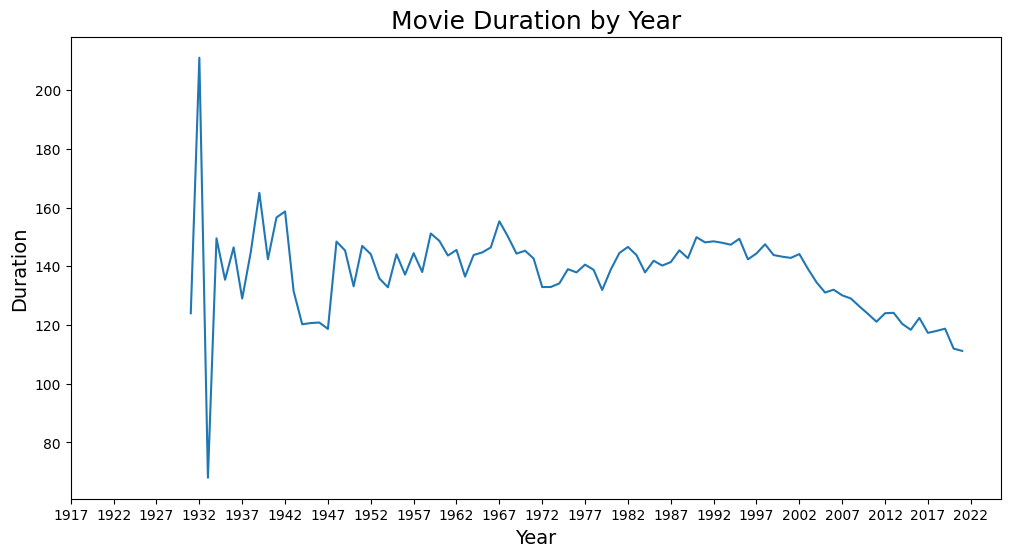

In [ ]:
df_movie['Duration']= df_movie['Duration'].astype(int)
df_movie['year']= df_movie['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_movie, x='year', y='Duration',errorbar=None)
plt.title('Movie Duration by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.xticks(np.arange (1917,2023,5))
plt.show()

In [ ]:
df_movie['Genre'] = df_movie['Genre'].str.split(',')

genre_df = df_movie.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,year
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2019
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2019
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2019
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1997
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1997
...,...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,1989
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1999
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1999
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1998


<ipython-input-63-ce3e363751c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index,palette='viridis')


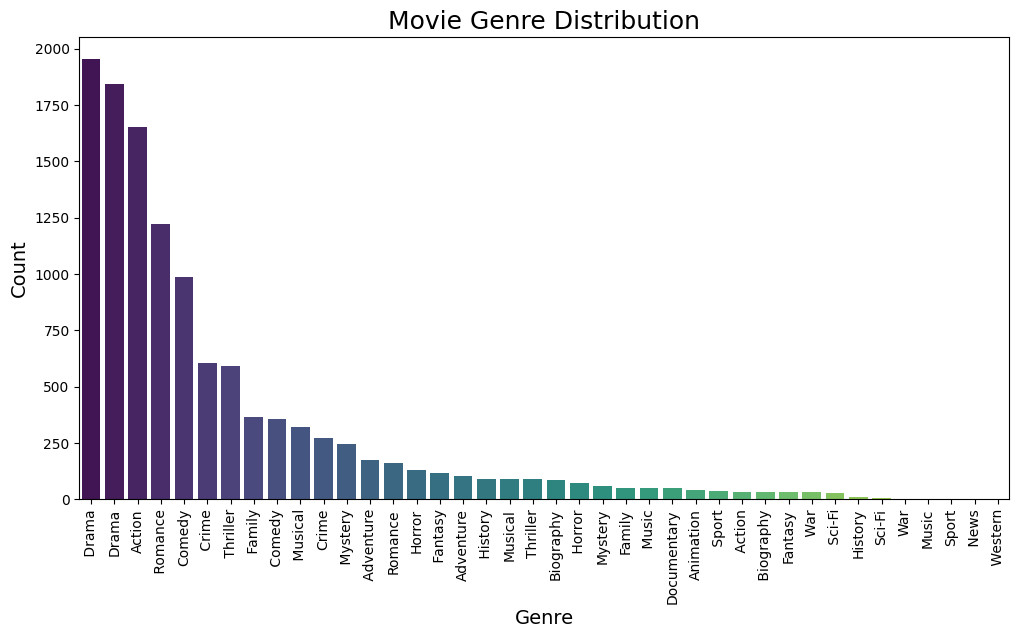

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index,palette='viridis')
plt.title('Movie Genre Distribution', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

<ipython-input-65-6c4e49a4952e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, x='Genre', y='Rating', palette='coolwarm')


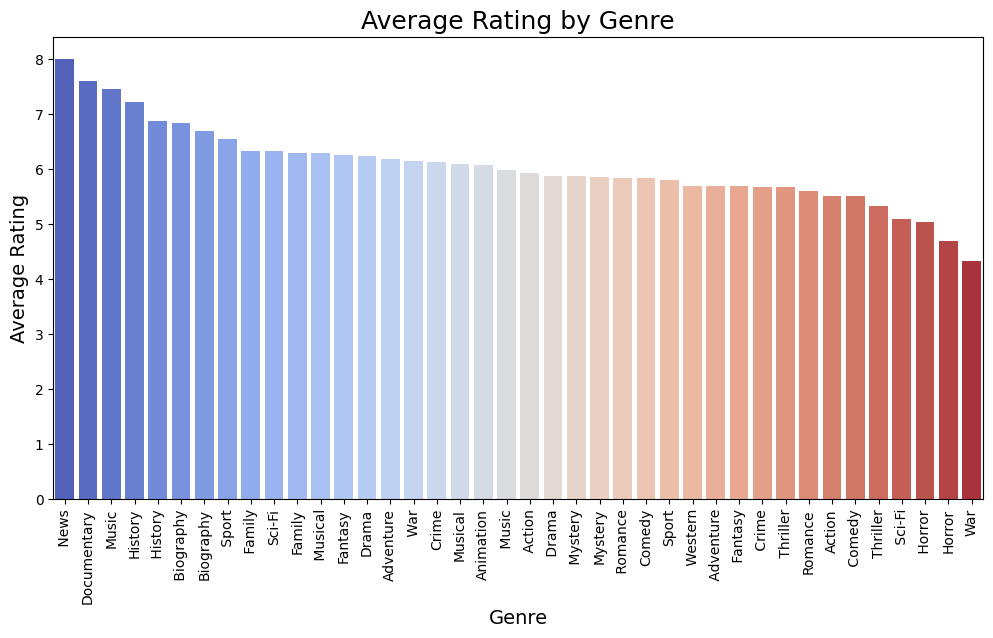

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_by_genre, x='Genre', y='Rating', palette='coolwarm')
plt.title('Average Rating by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelenconder = LabelEncoder()

trans_data= df_movie.drop(['Name'],axis=1)
trans_data['Director'] = labelenconder.fit_transform(df_movie['Actor 1'])

trans_data['Actor 1'] = labelenconder.fit_transform(df_movie['Actor 1'])
trans_data['Actor 2'] = labelenconder.fit_transform(df_movie['Actor 2'])
trans_data['Actor 3'] = labelenconder.fit_transform(df_movie['Actor 3'])

trans_data['Genre'] = labelenconder.fit_transform(df_movie['Genre'].apply(lambda x: ','.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,year
1,2019,109,229,7.0,8,1352,1352,2272,319,2019
3,2019,110,184,4.4,35,1198,1198,719,2148,2019
5,1997,147,157,4.7,827,378,378,75,2045,1997
6,2005,142,289,7.4,1086,692,692,1112,2524,2005
8,2012,82,320,5.6,326,1934,1934,1175,1013,2012


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data, columns=trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,year
0,0.977778,0.293333,0.610667,0.662921,0.000005,0.690148,0.690148,0.979310,0.124853,0.977778
1,0.977778,0.296667,0.490667,0.370787,0.000051,0.611536,0.611536,0.309914,0.840705,0.977778
2,0.733333,0.420000,0.418667,0.404494,0.001390,0.192956,0.192956,0.032328,0.800391,0.733333
3,0.822222,0.403333,0.770667,0.707865,0.001828,0.353241,0.353241,0.479310,0.987867,0.822222
4,0.900000,0.203333,0.853333,0.505618,0.000543,0.987238,0.987238,0.506466,0.396477,0.900000


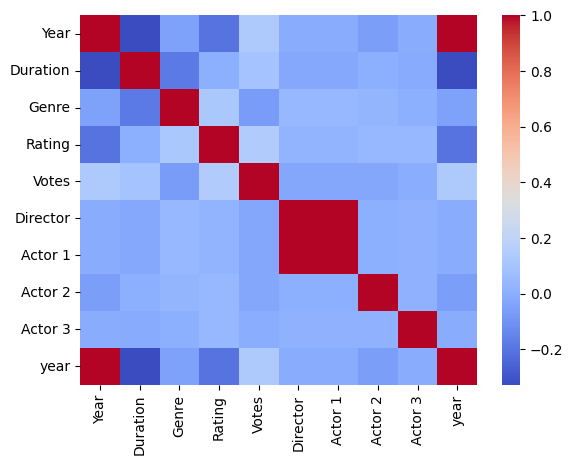

In [ ]:
corr_df = sc_df.corr()
sns.heatmap(corr_df, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x= trans_data.drop(['Rating'],axis=1)

In [ ]:
y= trans_data['Rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test= np.array(x_test)

In [ ]:
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.62582543, 5.83252909, 5.93318436, ..., 5.61028561, 5.61235147,
       6.53903943])

In [ ]:
!pip install scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean absolute Error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.08932404927655146
Mean Squared Error: 1.6863384054366168
Mean absolute Error: 1.0495806960259928


In [ ]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64


***TASK 2: COMPLETED***